In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import ARutils
import plotly.express as px
import plotly.io as pio
 
%matplotlib inline

In [2]:
transactions = [
    ['Milk', 'Bread', 'Saffron'],
    ['Milk', 'Saffron'],
    ['Bread', 'Saffron', 'Wafer'],
    ['Bread', 'Wafer'],
]
transactions

[['Milk', 'Bread', 'Saffron'],
 ['Milk', 'Saffron'],
 ['Bread', 'Saffron', 'Wafer'],
 ['Bread', 'Wafer']]

In [3]:
transaction_rules = list(apriori(transactions, min_support=0.2, min_confidence=0.5))
# for idx, rule in enumerate(transaction_rules):
#     print(f'Rule {idx}: {rule}', end='\n\n')

In [4]:
transaction_assc_rules = ARutils.extract(transaction_rules)

rules_df = pd.DataFrame(transaction_assc_rules, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
rules_df

,LHS,RHS,Support,Confidence,Lift
0,[],[Bread],0.75,0.750000,1.000000
1,[],[Milk],0.50,0.500000,1.000000
2,[],[Saffron],0.75,0.750000,1.000000
3,[],[Wafer],0.50,0.500000,1.000000
4,[Milk],[Bread],0.25,0.500000,0.666667
5,[],"[Bread, Saffron]",0.50,0.500000,1.000000
6,[Bread],[Saffron],0.50,0.666667,0.888889
7,[Saffron],[Bread],0.50,0.666667,0.888889
8,[],"[Bread, Wafer]",0.50,0.500000,1.000000
9,[Bread],[Wafer],0.50,0.666667,1.333333


In [5]:
ARutils.inspect(transaction_assc_rules)

The number of associated rules: 23
LHS: [] --> RHS:['Bread'], support: 0.75, confidence: 0.75, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Milk'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Saffron'], support: 0.75, confidence: 0.75, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Wafer'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Milk'] --> RHS:['Bread'], support: 0.25, confidence: 0.50, lift: 0.67
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Bread', 'Saffron'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Bread'] --> RHS:['Saffron'],

In [6]:
store_data = pd.read_csv('marketbasket.csv')
store_data.describe()

,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
freq,946,637,720,851,558,958,721,766,643,619,536,510,678,543


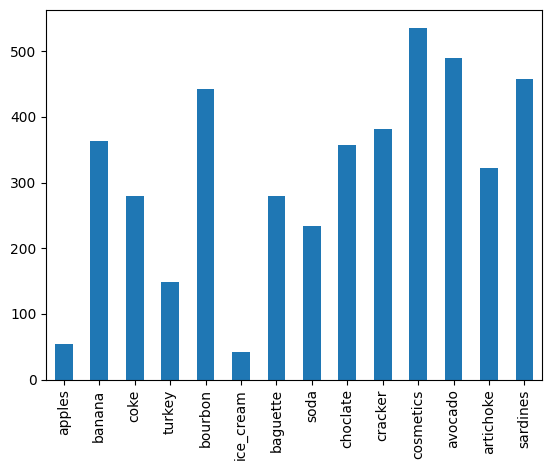

In [7]:
yes = (store_data == 'Yes').sum()
no = (store_data == 'No').sum()
purchased = pd.concat([yes, no], axis=1, keys=['yes', 'no'])
# print(purchased, type(purchased))
# print(no, list(no))
ax = yes.plot.bar()
plt.show()

In [19]:
store_transactions = ARutils.data_prepare(store_data)
# for each in store_transactions:
#     print(each)

In [20]:
store_rules = list(apriori(store_transactions, min_support=0.02, min_confidence=0.2))
store_assc_rules = ARutils.extract(store_rules)
print(f'store_rules has {len(store_rules)} rules')
print(f'store_assc_rules has {len(store_assc_rules)} rules')

df = pd.DataFrame(store_assc_rules, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
df

store_rules has 1460 rules
store_assc_rules has 27348 rules


,LHS,RHS,Support,Confidence,Lift
0,[],[artichoke],0.322,0.322000,1.000000
1,[],[avocado],0.490,0.490000,1.000000
2,[],[baguette],0.279,0.279000,1.000000
3,[],[banana],0.363,0.363000,1.000000
4,[],[bourbon],0.442,0.442000,1.000000
...,...,...,...,...,...
27343,"[soda, choclate, baguette, bourbon, turkey, co...",[cracker],0.021,0.840000,2.204724
27344,"[soda, choclate, baguette, bourbon, turkey, sa...",[coke],0.021,1.000000,3.571429
27345,"[soda, baguette, bourbon, turkey, coke, sardin...",[choclate],0.021,0.954545,2.673797
27346,"[soda, choclate, baguette, turkey, coke, sardi...",[bourbon],0.021,1.000000,2.262443


In [10]:
df.nlargest(10, 'Lift')

,LHS,RHS,Support,Confidence,Lift
26986,"[choclate, bourbon, baguette, coke]","[soda, banana, cracker, turkey]",0.022,0.400000,16.666667
27024,"[soda, banana, cracker, turkey]","[choclate, baguette, bourbon, coke]",0.022,0.916667,16.666667
26990,"[bourbon, baguette, cracker, coke]","[banana, soda, choclate, turkey]",0.022,0.423077,16.272189
27020,"[choclate, soda, banana, turkey]","[bourbon, baguette, cracker, coke]",0.022,0.846154,16.272189
27212,"[sardines, baguette, cracker, coke]","[soda, choclate, bourbon, turkey]",0.021,0.552632,16.253870
27230,"[soda, choclate, bourbon, turkey]","[sardines, baguette, cracker, coke]",0.021,0.617647,16.253870
27013,"[banana, bourbon, cracker, turkey]","[soda, choclate, baguette, coke]",0.022,0.647059,16.176471
26997,"[soda, choclate, baguette, coke]","[banana, bourbon, cracker, turkey]",0.022,0.550000,16.176471
27176,"[soda, choclate, turkey]","[baguette, bourbon, coke, sardines, cracker]",0.021,0.552632,15.789474
27266,"[baguette, bourbon, coke, sardines, cracker]","[soda, choclate, turkey]",0.021,0.600000,15.789474


In [11]:
df[df['LHS'].apply(lambda x: len(x) > 0)].nlargest(10, 'Support')

,LHS,RHS,Support,Confidence,Lift
56,[avocado],[cosmetics],0.356,0.726531,1.355468
57,[cosmetics],[avocado],0.356,0.664179,1.355468
126,[choclate],[cracker],0.321,0.899160,2.359999
127,[cracker],[choclate],0.321,0.842520,2.359999
115,[bourbon],[sardines],0.297,0.671946,1.470341
116,[sardines],[bourbon],0.297,0.649891,1.470341
149,[cosmetics],[sardines],0.238,0.444030,0.971619
150,[sardines],[cosmetics],0.238,0.520788,0.971619
108,[bourbon],[cosmetics],0.231,0.522624,0.975046
109,[cosmetics],[bourbon],0.231,0.430970,0.975046


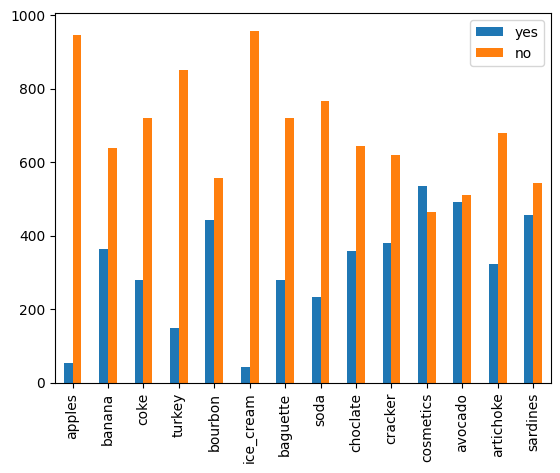

In [12]:
ax = purchased.plot.bar()
plt.show()

In [13]:
cosmetics_rules = list(apriori(store_transactions, min_support=0.1, min_confidence=0.5))
cosmetics_assc_rules = ARutils.extract(cosmetics_rules, 'cosmetics', 2)
ARutils.inspect(cosmetics_assc_rules)

The number of associated rules: 24
LHS: ['artichoke'] --> RHS:['cosmetics'], support: 0.17, confidence: 0.52, lift: 0.97
--------------------------------------------------------------------------------
LHS: ['avocado'] --> RHS:['cosmetics'], support: 0.36, confidence: 0.73, lift: 1.36
--------------------------------------------------------------------------------
LHS: ['banana'] --> RHS:['cosmetics'], support: 0.19, confidence: 0.53, lift: 0.99
--------------------------------------------------------------------------------
LHS: ['bourbon'] --> RHS:['cosmetics'], support: 0.23, confidence: 0.52, lift: 0.98
--------------------------------------------------------------------------------
LHS: ['choclate'] --> RHS:['cosmetics'], support: 0.19, confidence: 0.54, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['coke'] --> RHS:['cosmetics'], support: 0.14, confidence: 0.51, lift: 0.95
---------------------------------------------------------

In [14]:
cosmetics_df = pd.DataFrame(cosmetics_assc_rules, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
cosmetics_df

,LHS,RHS,Support,Confidence,Lift
0,[artichoke],[cosmetics],0.167,0.518634,0.967600
1,[avocado],[cosmetics],0.356,0.726531,1.355468
2,[banana],[cosmetics],0.192,0.528926,0.986802
3,[bourbon],[cosmetics],0.231,0.522624,0.975046
4,[choclate],[cosmetics],0.192,0.537815,1.003386
5,[coke],[cosmetics],0.143,0.510714,0.952825
6,[cracker],[cosmetics],0.211,0.553806,1.033220
7,[sardines],[cosmetics],0.238,0.520788,0.971619
8,"[avocado, artichoke]",[cosmetics],0.116,0.734177,1.369734
9,"[banana, avocado]",[cosmetics],0.119,0.668539,1.247275


In [15]:
fig = px.scatter(
    cosmetics_df, 
    x='Support', 
    y='Confidence', 
    color='Lift', 
    size='Lift', 
    hover_data=['LHS', 'RHS'], 
    color_continuous_scale='agsunset'
)
fig.show()


In [16]:
avocado_rules = list(apriori(store_transactions, min_support=0.02, min_confidence=0.2, max_length=3))
avocado_assc_rules = ARutils.extract(avocado_rules)
avocado_df = pd.DataFrame(avocado_assc_rules, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
avocado_df

,LHS,RHS,Support,Confidence,Lift
0,[],[artichoke],0.322,0.322000,1.000000
1,[],[avocado],0.490,0.490000,1.000000
2,[],[baguette],0.279,0.279000,1.000000
3,[],[banana],0.363,0.363000,1.000000
4,[],[bourbon],0.442,0.442000,1.000000
...,...,...,...,...,...
1163,"[soda, turkey]",[cracker],0.038,0.558824,1.466728
1164,[turkey],"[soda, sardines]",0.045,0.302013,2.323180
1165,"[soda, sardines]",[turkey],0.045,0.346154,2.323180
1166,"[sardines, turkey]",[soda],0.045,0.576923,2.465483


In [17]:
avocado_df = avocado_df[avocado_df['RHS'].apply(lambda x: 'avocado' in x)].sort_values(by=['Lift'], ascending=False)
avocado_df

,LHS,RHS,Support,Confidence,Lift
548,[coke],"[avocado, turkey]",0.068,0.242857,3.571429
549,[turkey],"[avocado, coke]",0.068,0.456376,3.405790
168,[apples],"[choclate, avocado]",0.023,0.425926,2.353182
517,[cracker],"[choclate, avocado]",0.158,0.414698,2.291150
516,[choclate],"[cracker, avocado]",0.158,0.442577,2.201876
...,...,...,...,...,...
533,[coke],"[cosmetics, avocado]",0.089,0.317857,0.892857
243,"[turkey, artichoke]",[avocado],0.021,0.428571,0.874636
224,"[artichoke, coke]",[avocado],0.037,0.415730,0.848429
567,[turkey],"[cosmetics, avocado]",0.043,0.288591,0.810648


In [18]:
avocado_fig = px.scatter(
    avocado_df,
    x='Support', 
    y='Confidence', 
    color='Lift', 
    size='Lift', 
    hover_data=['LHS', 'RHS'], 
    color_continuous_scale='agsunset'

)
avocado_fig.show()